In [1]:
import pandas as pd
xl = pd.ExcelFile("./Classeur.xlsx")
xl.sheet_names

['Feuil1', 'Feuil2']

In [2]:
df = xl.parse('Feuil2')

In [3]:
df.tail()

,x,y,z
798,19.328cm,7.96cm,34.189cm
799,19.328cm,7.767cm,35.136cm
800,19.328cm,7.584cm,36.576cm
801,19.328cm,7.926cm,38.098cm
802,19.328cm,9.274cm,40.703cm


In [4]:
df["x"][327]="15.184cm"

In [5]:
df.loc[803]=["19.328cm","9.616cm","27.031cm"]

In [6]:
for k,v in df['x'].items():
    #print(df['x'][k])
    df['x'][k]=df['x'][k][:-2]
for k,v in df['y'].items():
    df['y'][k]=df['y'][k][:-2]
for k,v in df['z'].items():
    df['z'][k]=df['z'][k][:-2]

In [7]:
df.tail()

,x,y,z
799,19.328,7.767,35.136
800,19.328,7.584,36.576
801,19.328,7.926,38.098
802,19.328,9.274,40.703
803,19.328,9.616,27.031


In [8]:
df.isnull().sum()

x    0
y    0
z    0
dtype: int64

In [9]:
import numpy as np
x=np.asarray(df['x']).astype(float)


import math


y=np.asarray(df['y']).astype(float)
z=np.asarray(df['z']).astype(float)

for i in x:
    i=math.floor(i)
for i in y:
    i=math.floor(i)
for i in z:
    i=math.floor(i)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
n = 100

ax.scatter(y, z)

ax.set_xlabel('y')

ax.set_ylabel('z')

plt.show()

In [10]:
len(z)

804

In [11]:
import pandas as pd
data3=pd.DataFrame(columns=("x","y","z"))
data3['x']=x
data3['y']=y
data3['z']=z

In [12]:
data3['index']=df.index.values

In [13]:
data3.head()

,x,y,z,index
0,7.319,23.569,35.296,0
1,7.571,22.500,32.520,1
2,7.712,22.003,31.371,2
3,7.908,21.309,29.766,3
4,8.287,20.293,27.086,4


In [14]:
data3.shape

(804, 4)

In [15]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors = 2, algorithm='ball_tree').fit(df[["x","y","z"]])

distances, indices = knn.kneighbors(df[["x","y","z"]])
"""
for i in indices:
    print( i[0],i)"""

'\nfor i in indices:\n    print( i[0],i)'

In [16]:
azerty=[[0,10,11,1],[1,11,12,2],[2,12,13,3],[3,13,14,4],[4,14,15,5],[5,15,16,6],[6,16,17,7],[7,17,18,8],[8,18,19,9],[10,20,21,11],[11,21,22,12],[12,22,23,13],[13,23,24,14],[14,24,25,15],[15,25,26,16],[16,26,27,17],[17,27,28,18],[18,28,29,19],[20,32,33,21],[21,33,34,35],[21,35,36,22],[22,36,37,23],[23,37,38,24],[24,38,39,25],[38,76,83,39],[39,83,84,25],[25,84,85,26],[26,85,86,27],[28,30,31,29],[30,88,89,31],[27,86,87,28],[28,87,88,30],[37,43,44,38],[43,48,49,44],[48,53,54,49],[53,59,62,54],[59,64,65,62],[64,66,67,65],[65,67,70,71],[62,65,71,72],[54,62,72,73],[49,54,73,74],[44,49,74,75],[38,44,75,76],[71,70,77,78],[72,71,78,79],[73,72,79,80],[74,73,80,81],[75,74,81,82],[77,102,101,78],[78,101,100,79],[79,100,99,80],[80,99,98,81],[81,98,97,82],[102,103,104,101],[101,104,105,100],[100,105,106,99],[99,106,107,98],[98,107,108,97],[32,205,204,33],[33,204,203,34],[34,203,202,40],[40,202,201,45],[45,201,200,50],[50,200,199,55],[55,199,198,60],[60,198,197,63],[63,197,196,68],[68,196,195,69],[196,192,191,195],[205,206,207,204],[204,207,208,203],[203,208,209,202],[202,209,210,201],[201,210,211,200],[200,211,212,199],[199,212,194,198],[198,194,193,197],[197,193,192,196],[206,219,218,207],[207,218,217,208],[208,217,216,209],[209,216,215,210],[210,215,214,211],[211,214,213,212],[212,213,190,194],[194,190,189,193],[193,189,188,192],[192,188,187,191],[219,220,221,218],[218,221,222,217],[217,222,223,216],[216,223,224,215],[215,224,225,214],[214,225,226,213],[213,226,186,190],[190,186,185,189],[189,185,184,188],[188,184,183,187],[220,802,801,221],[221,801,800,222],[222,800,799,231],[223,222,231,230],[224,223,230,229],[224,229,228,225],[225,228,227,226],[186,226,227,182],[185,186,182,181],[184,185,181,180],[183,184,180,179],[179,180,176,175],[180,181,177,176],[181,182,178,177],[182,227,232,178],[227,228,233,232],[228,229,234,233],[229,230,235,234],[230,231,236,235],[231,799,798,236],[36,42,43,37],[42,47,48,43],[47,52,53,48],[52,58,59,53],[35,41,42,36],[41,46,47,42],[46,51,52,47],[51,56,58,52],[35,34,40,41],[41,40,45,46],[46,45,50,51],[51,50,55,56],[56,55,60,57],[57,60,63,61],[61,63,68,64],[64,68,69,66],[58,61,64,59],[56,57,61,58],[76,75,82,83],[83,82,97,96],[103,138,137,104],[104,137,136,105],[105,136,135,106],[106,135,134,107],[138,139,140,137],[137,140,141,136],[136,141,142,135],[135,142,143,134],[139,170,169,140],[140,169,168,141],[141,168,167,142],[142,167,166,143],[170,174,173,169],[169,173,172,168],[174,175,176,173],[173,176,177,172],[172,177,178,171],[171,178,232,237],[83,96,95,84],[84,95,94,85],[85,94,93,86],[86,93,92,87],[87,92,91,88],[88,91,90,89],[89,90,117,118],[31,89,118,119],[97,108,109,96],[96,109,110,95],[95,110,111,94],[94,111,112,93],[93,112,113,92],[92,113,114,91],[91,114,115,90],[90,115,116,117],[232,233,238,237],[172,171,167,168],[171,237,246,167],[237,238,245,246],[246,245,248,247],[167,246,247,166],[107,134,133,108],[108,133,132,109],[109,132,131,110],[110,131,130,111],[134,143,144,133],[133,144,145,132],[132,145,146,131],[131,146,147,130],[143,166,165,144],[144,165,164,145],[145,164,163,146],[146,163,162,147],[166,247,254,165],[165,254,255,164],[164,255,259,163],[163,259,264,263]]

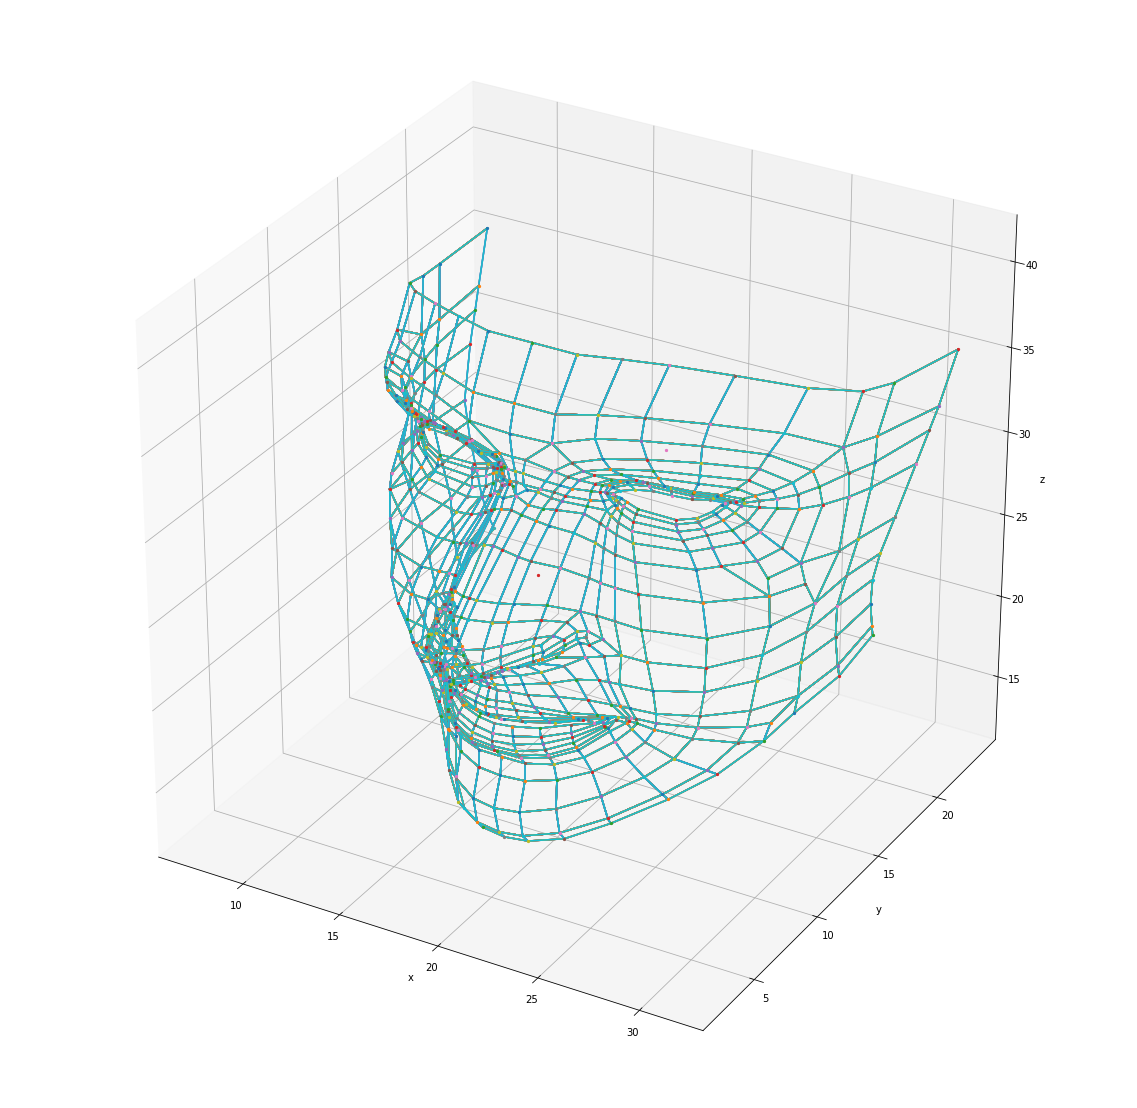

In [95]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
n = 100

#ax.plot(data3['x'], data3['z'])
#ax.scatter(data3['x'], data3['z'])
            
for i,type in enumerate(data3['x']):
    x = data3['x'][i]
    y =  data3['y'][i]
    z =  data3['z'][i]
    ax.scatter(x, y, z,marker='o')
    
   
    ax.text(x, y,z, i, fontsize=17)

for i in azerty:
    for j in i:
        xPts=[]
        yPts=[]
        zPts=[]
        pts=np.concatenate((i,[i[0]]))
        for k in pts: #for k in i:
            
            yPts=np.concatenate((yPts,[data3["y"][k]]))
            
            xPts=np.concatenate((xPts,[data3["x"][k]]))
            zPts=np.concatenate((zPts,[data3["z"][k]]))    
            
            ax.plot(xPts,yPts, zPts)
            
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [17]:
data3.head()

,x,y,z,index
0,7.319,23.569,35.296,0
1,7.571,22.500,32.520,1
2,7.712,22.003,31.371,2
3,7.908,21.309,29.766,3
4,8.287,20.293,27.086,4


In [93]:

import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=data3["x"],
    y=data3["y"],
    z=data3["z"],
    mode='markers',
    name="vertices",
    marker=dict(
        size=2,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

for i in azerty:
    for j in i:
        xPts=[]
        yPts=[]
        zPts=[]
        pts=np.concatenate((i,[i[0]]))
        for k in pts:
            
            yPts=np.concatenate((yPts,[data3["y"][k]]))
            
            xPts=np.concatenate((xPts,[data3["x"][k]]))
            zPts=np.concatenate((zPts,[data3["z"][k]]))   
            
            
trace2=go.Scatter3d(x=xPts,
               y=yPts,
               z=zPts,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=2),
               hoverinfo='none',
               name="polygons"
               )

data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Face_points')

In [92]:
azerty=[[0,10,11,1],[1,11,12,2],[2,12,13,3],[3,13,14,4],[4,14,15,5],[5,15,16,6],[6,16,17,7],[7,17,18,8],[8,18,19,9],[10,20,21,11],[11,21,22,12],[12,22,23,13],[13,23,24,14],[14,24,25,15],[15,25,26,16],[16,26,27,17],[17,27,28,18],[18,28,29,19],[20,32,33,21],[21,33,34,35],[21,35,36,22],[22,36,37,23],[23,37,38,24],[24,38,39,25],[38,76,83,39],[39,83,84,25],[25,84,85,26],[26,85,86,27],[28,30,31,29],[30,88,89,31],[27,86,87,28],[28,87,88,30],[37,43,44,38],[43,48,49,44],[48,53,54,49],[53,59,62,54],[59,64,65,62],[64,66,67,65],[65,67,70,71],[62,65,71,72],[54,62,72,73],[49,54,73,74],[44,49,74,75],[38,44,75,76],[71,70,77,78],[72,71,78,79],[73,72,79,80],[74,73,80,81],[75,74,81,82],[77,102,101,78],[78,101,100,79],[79,100,99,80],[80,99,98,81],[81,98,97,82],[102,103,104,101],[101,104,105,100],[100,105,106,99],[99,106,107,98],[98,107,108,97],[32,205,204,33],[33,204,203,34],[34,203,202,40],[40,202,201,45],[45,201,200,50],[50,200,199,55],[55,199,198,60],[60,198,197,63],[63,197,196,68],[68,196,195,69],[196,192,191,195],[205,206,207,204],[204,207,208,203],[203,208,209,202],[202,209,210,201],[201,210,211,200],[200,211,212,199],[199,212,194,198],[198,194,193,197],[197,193,192,196],[206,219,218,207],[207,218,217,208],[208,217,216,209],[209,216,215,210],[210,215,214,211],[211,214,213,212],[212,213,190,194],[194,190,189,193],[193,189,188,192],[192,188,187,191],[219,220,221,218],[218,221,222,217],[217,222,223,216],[216,223,224,215],[215,224,225,214],[214,225,226,213],[213,226,186,190],[190,186,185,189],[189,185,184,188],[188,184,183,187],[220,802,801,221],[221,801,800,222],[222,800,799,231],[223,222,231,230],[224,223,230,229],[224,229,228,225],[225,228,227,226],[186,226,227,182],[185,186,182,181],[184,185,181,180],[183,184,180,179],[179,180,176,175],[180,181,177,176],[181,182,178,177],[182,227,232,178],[227,228,233,232],[228,229,234,233],[229,230,235,234],[230,231,236,235],[231,799,798,236],[36,42,43,37],[42,47,48,43],[47,52,53,48],[52,58,59,53],[35,41,42,36],[41,46,47,42],[46,51,52,47],[51,56,58,52],[35,34,40,41],[41,40,45,46],[46,45,50,51],[51,50,55,56],[56,55,60,57],[57,60,63,61],[61,63,68,64],[64,68,69,66],[58,61,64,59],[56,57,61,58],[76,75,82,83],[83,82,97,96],[103,138,137,104],[104,137,136,105],[105,136,135,106],[106,135,134,107],[138,139,140,137],[137,140,141,136],[136,141,142,135],[135,142,143,134],[139,170,169,140],[140,169,168,141],[141,168,167,142],[142,167,166,143],[170,174,173,169],[169,173,172,168],[174,175,176,173],[173,176,177,172],[172,177,178,171],[171,178,232,237],[83,96,95,84],[84,95,94,85],[85,94,93,86],[86,93,92,87],[87,92,91,88],[88,91,90,89],[89,90,117,118],[31,89,118,119],[97,108,109,96],[96,109,110,95],[95,110,111,94],[94,111,112,93],[93,112,113,92],[92,113,114,91],[91,114,115,90],[90,115,116,117],[232,233,238,237],[172,171,167,168],[171,237,246,167],[237,238,245,246],[246,245,248,247],[167,246,247,166],[107,134,133,108],[108,133,132,109],[109,132,131,110],[110,131,130,111],[134,143,144,133],[133,144,145,132],[132,145,146,131],[131,146,147,130],[143,166,165,144],[144,165,164,145],[145,164,163,146],[146,163,162,147],[166,247,254,165],[165,254,255,164],[164,255,259,163],[163,259,264,263],[163,263,268,162],[247,248,253,254],[254,253,256,255],[255,256,260,259],[259,260,265,264],[233,234,239,238],[234,235,240,239],[235,236,241,240],[236,798,797,241],[111,130,129,112],[112,129,128,113],[113,128,127,114],[114,127,126,115],[115,126,125,116],[238,239,244,245],[245,244,249,248],[248,249,252,253],[253,252,257,256],[256,257,261,260],[239,240,243,244],[244,243,250,249],[249,250,251,252],[252,251,258,257],[240,241,242,243],[243,242,796,250],[241,797,796,242],[250,796,795,251],[251,795,794,258],[258,794,793,262],[130,148,149,129],[129,149,150,128],[128,150,151,127],[130,147,160,148],[147,162,161,160],[162,268,269,161],[161,269,270,160],[160,270,159,148],[148,159,158,149],[149,158,157,150],[268,274,273,269],[269,273,272,270],[257,258,262,261],[260,261,266,265],[261,262,267,266],[262,793,792,267],[263,275,274,268],[263,264,276,275],[264,265,277,276],[265,266,278,277],[266,267,279,278],[267,792,791,279],[150,157,155,151],[127,151,152,126],[126,152,153,125],[158,310,315,157],[310,311,316,315],[311,312,317,316],[312,313,318,317],[313,314,319,318],[314,784,783,319],[279,791,790,284],[284,790,789,289],[289,789,788,294],[294,788,787,299],[299,787,786,304],[304,786,785,309],[309,785,784,314],[319,783,782,324],[324,782,781,340],[340,781,780,341],[341,780,779,342],[342,779,778,343],[298,299,304,303],[303,304,309,308],[308,309,314,313],[313,314,319,318],[318,319,324,323],[323,324,340,336],[336,340,341,337],[297,298,303,302],[302,303,308,307],[307,308,313,312],[312,313,318,317],[317,318,323,322],[322,323,336,332],[332,336,337,333],[296,297,302,301],[301,302,307,306],[306,307,312,311],[311,312,317,316],[316,317,322,321],[159,305,310,158],[305,306,311,310],[278,279,284,283],[283,284,289,288],[288,289,294,293],[293,294,299,298],[277,278,283,282],[282,283,288,287],[287,288,293,292],[292,293,298,297],[276,277,282,281],[281,282,287,286],[286,287,292,291],[337,341,342,338],[338,342,343,339],[333,337,338,334],[334,338,339,335],[153,349,124,125],[116,125,124,123],[117,116,123,122],[118,117,122,121],[119,118,121,120],[347,359,362,348],[348,362,365,349],[349,365,368,124],[124,368,371,123],[123,371,374,122],[122,374,375,121],[121,375,376,120],[356,357,360,359],[359,360,363,362],[362,363,366,365],[365,366,369,368],[368,369,372,371],[371,372,377,374],[374,377,378,375],[375,378,379,376],[354,355,358,357],[357,358,361,360],[360,361,364,363],[363,364,367,366],[366,367,370,369],[369,370,373,372],[372,373,380,377],[377,380,381,378],[378,381,382,379],[355,776,775,358],[358,775,774,361],[361,774,773,364],[364,773,772,367],[367,772,771,370],[370,771,770,373],[373,770,769,380],[380,769,768,381],[381,768,767,382],[270,272,271,159],[159,271,300,305],[300,301,306,305],[290,291,296,295],[291,292,297,296],[295,296,301,300],[275,276,281,280],[280,281,286,285],[285,286,291,290],[275,280,285,274],[274,285,290,273],[321,322,332,326],[326,332,333,329],[329,333,334,330],[330,334,335,331],[353,354,357,356],[315,316,321,320],[352,777,776,355],[351,352,355,354],[350,351,354,353],[320,321,326,325],[157,315,320,155],[344,350,353,345],[345,353,356,346],[346,356,359,347],[155,320,325,156],[151,155,153,152],[153,154,348,349],[155,156,154,153],[154,346,347,348],[777,611,610,776],[611,612,613,610],[655,654,638,639],[612,625,624,613],[779,656,640,778],[656,655,639,640],[776,610,609,775],[775,609,608,774],[774,608,607,773],[773,607,606,772],[772,606,605,771],[771,605,601,770],[770,601,600,769],[769,600,599,768],[768,599,598,767],[610,613,614,609],[609,614,615,608],[608,615,616,607],[607,616,617,606],[606,617,618,605],[605,618,602,601],[601,602,597,600],[600,597,596,599],[599,596,595,598],[613,624,623,614],[614,623,622,615],[615,622,621,616],[616,621,620,617],[617,620,619,618],[618,619,603,602],[602,603,594,597],[597,594,593,596],[596,593,592,595],[780,657,656,779],[657,658,655,656],[658,659,654,655],[781,666,657,780],[666,665,658,657],[802,518,517,801],[801,517,516,800],[800,516,527,799],[518,497,498,517],[517,498,499,516],[799,527,528,798],[798,528,569,797],[797,569,570,796],[796,571,722,795],[795,722,723,794],[518,497,498,517],[517,498,499,516],[516,499,500,515],[515,500,501,514],[514,501,502,513],[513,502,503,512],[512,503,504,511],[511,504,505,510],[510,505,506,509],[509,506,507,508],[497,496,495,498],[498,495,494,499],[499,494,493,500],[500,493,492,501],[501,492,491,502],[502,491,490,503],[503,490,489,504],[504,489,488,505],[505,488,487,506],[506,487,486,507],[496,475,476,495],[495,476,477,494],[494,477,478,493],[493,478,479,492],[492,479,480,491],[491,480,481,490],[490,481,482,489],[489,482,483,488],[488,483,484,487],[487,484,485,486],[475,408,409,476],[476,409,410,477],[477,410,474,478],[478,474,473,479],[479,473,472,480],[480,472,471,481],[481,471,470,482],[482,470,469,483],[483,469,468,484],[484,468,467,485],[402,383,384,401],[401,384,385,400],[400,385,386,399],[399,386,387,398],[398,387,388,397],[397,388,389,396],[396,389,390,395],[395,390,391,394],[394,391,392,393],[403,402,401,404],[404,401,400,405],[405,400,399,406],[406,399,398,407],[407,398,397,416],[416,397,396,417],[417,396,395,418],[418,395,394,419],[419,394,393,420],[408,403,404,409],[409,404,411,410],[ 474,410,411,459],[473,474,459,460],[472,473,460,461],[471,472,461,462],[470,471,462,463],[469,470,463,464],[468,469,464,465],[467,468,465,466],[411,404,405,412],[412,405,406,413],[413,406,407,414],[414,407,416,415],[431,415,416,430],[430,416,417,429],[429,417,418,428],[428,418,419,427],[427,419,421,426],[426,421,422,425],[421,419,420,422],[619,626,604,603],[603,604,589,594],[594,589,590,593],[593,590,591,592],[626,628,627,604],[604,627,588,589],[589,588,424,590],[590,424,423,591],[588,587,425,424],[424,425,422,423],[527,516,515,526],[526,515,514,525],[525,514,513,524],[524,513,512,523],[523,512,511,522],[522,511,510,521],[521,510,509,520],[520,509,508,519],[794,723,728,793],[793,728,729,792],[792,729,730,791],[791,730,731,790],[790,731,732,789],[789,732,733,788],[788,733,703,787],[787,703,702,786],[786,702,701,785],[785,701,688,784],[784,688,687,783],[783,687,667,782],[782,667,666,781],[703,705,704,702],[702,704,700,701],[701,700,689,688],[688,689,686,687],[687,686,668,667],[667,668,665,666],[704,706,699,700],[700,699,690,689],[689,690,685,686],[686,685,664,668],[668,664,663,665],[665,663,659,658],[542,543,544,545],[545,544,554,553],[553,554,555,556],[556,555,579,578],[578,579,580,674],[674,580,581,673],[673,581,582,672],[543,438,437,544],[544,437,436,554],[554,436,435,555],[555,435,434,579],[579,434,433,580],[438,439,440,437],[437,440,441,436],[436,441,442,435],[435,442,443,434],[434,443,444,433],[439,450,449,440],[440,449,448,441],[441,448,447,442],[442,447,446,443],[443,446,445,444],[444,445,414,432],[432,414,415,431],[454,453,447,448],[447,453,452,446],[446,452,451,445],[445,451,413,414],[722,721,724,723],[723,724,739,728],[728,739,738,729],[729,738,737,730],[730,737,736,731],[731,736,735,732],[732,735,734,733],[733,734,705,703],[530,531,563,565],[565,563,564,567],[567,564,573,572],[572,573,720,721],[721,720,725,724],[724,725,740,739],[739,740,741,738],[738,741,756,737],[737,756,757,736],[736,757,763,735],[735,763,764,734],[734,764,708,705],[705,708,706,704],[531,532,561,563],[563,561,562,564],[564,562,574,573],[573,574,719,720],[720,719,726,725],[725,726,742,740],[740,742,743,741],[620,629,626,619],[629,631,628,626],[628,642,641,627],[645,644,641,642],[574,575,718,719],[575,576,717,718],[576,577,675,717],[577,578,674,675],[719,718,727,726],[718,717,716,727],[717,675,676,716],[675,674,673,676],[726,727,744,742],[727,716,715,744],[716,676,677,715],[676,673,672,677],[433,444,432,431],[580,433,431,581],[581,431,430,582],[582,430,429,583],[583,429,428,584],[584,428,427,585],[585,427,426,586],[586,426,425,587],[672,582,583,671],[671,583,584,670],[670,584,585,669],[669,585,586,644],[644,586,587,641],[641,587,588,627],[571,572,721,722],[570,568,571,796],[568,567,572,571],[569,566,568,570],[566,565,567,568],[528,529,566,569],[529,530,565,566],[527,526,529,528],[526,525,530,529],[530,525,524,531],[524,523,532,531],[677,672,671,678],[678,671,670,679],[679,670,669,680],[680,669,644,645],[624,634,633,623],[623,633,632,622],[622,632,630,621],[621,630,629,620],[646,645,642,643],[643,642,628,631],[741,743,755,756],[756,755,758,757],[757,758,762,763],[742,744,745,743],[743,745,754,755],[755,754,759,758],[758,759,760,762],[461,460,456,457],[457,456,452,453],[460,459,455,456],[456,455,451,452],[459,411,412,455],[455,412,413,451],[541,542,545,546],[546,545,553,552],[552,553,556,557],[557,556,578,577],[540,541,546,547],[547,546,552,551],[551,552,557,558],[558,557,577,576],[539,540,547,548],[548,547,551,550],[550,551,558,559],[559,558,576,575],[562,559,575,574],[708,710,707,706],[706,707,698,699],[699,698,691,690],[690,691,684,685],[685,684,662,664],[466,465,449,450],[465,454,448,449],[465,464,458,454],[463,462,458,464],[462,461,457,458],[458,457,453,454],[523,522,533,532],[522,521,534,533],[521,520,535,534],[520,519,536,535],[532,533,560,561],[561,560,559,562],[560,549,550,559],[664,662,661,663],[698,697,692,691],[697,696,693,692],[696,695,694,693],[695,678,679,694],[691,692,683,684],[692,693,682,683],[693,694,681,682],[694,679,680,681],[710,711,709,707],[707,709,697,698],[763,762,765,764],[764,765,710,708],[759,754,753,760],[754,745,748,753],[681,680,645,646],[682,681,646,647],[533,534,549,560],[534,535,538,549],[549,538,548,550],[535,536,537,538],[538,537,539,548],[762,760,761,765],[765,761,711,710],[712,751,750,696],[750,713,695,696],[713,714,678,695],[760,753,752,761],[663,661,660,659],[715,677,678,714],[273,290,295,272],[272,295,300,271],[709,712,696,697],[711,751,712,709],[761,752,751,711],[753,748,749,752],[752,749,750,751],[746,714,713,747],[749,747,713,750],[748,746,747,749],[745,744,746,748],[744,715,714,746],[659,660,653,654],[654,653,637,638],[684,683,652,662],[683,682,647,652],[625,636,634,624],[647,646,643,631],[648,647,631,635],[662,652,651,661],[630,635,631,629],[635,630,632,633],[661,651,650,660],[660,650,649,653],[653,649,636,637],[636,649,633,634],[652,647,648,651],[649,648,635,633],[651,648,649,650],[325,326,329,327],[327,329,330,328],[328,330,331,344],[328,344,345,346],[156,328,346,154],[156,325,327,328]]

In [20]:
for k,v in enumerate(azerty):

    azerty[k] =  np.concatenate((v,[v[0]]))

In [21]:
L=len(azerty)
L

757

In [22]:
data = data3[["x","z"]]

In [23]:
N=len(data['x'])
N

804

In [24]:
labels=[]
group=[]
for node in data3['index']:
    labels.append(data3['x'][node])
    group.append(data3['z'][node])

In [25]:
coor=[]
for i in data3['index']:
    coor.append([data3['x'][i],data3['y'][i],data3['z'][i]])

In [26]:
coor[3]

[7.908, 21.309, 29.766]

In [27]:
layt=coor

In [28]:
Edges=[]
for k in range(L):
    for j in range(4):
        Edges+=[(azerty[k][j],azerty[k][j+1])]

In [29]:
Xn=[layt[k][0] for k in range(N)]# x-coordinates of vertices
Yn=[layt[k][1] for k in range(N)]
Zn=[layt[k][2] for k in range(N)]
Xe=[]
Ye=[]
Ze=[]
for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]  
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]  

In [30]:
import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter(
    x=data3["x"],
    
    y=data3["z"],
    mode='markers+text',
    name="vertices",
    marker=dict(
        size=1,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.1
        ),
        opacity=0.8
    ),
    
    text=data3['index']
)
trace2=go.Scatter(x=Xe,
               
               y=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=0.5),
               hoverinfo='none',
               name="polygons"
               )

data = [trace1,trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Face_points')

In [31]:

import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=data3["x"],
    y=data3["y"],
    z=data3["z"],
    mode='markers',
    name="vertices",
    marker=dict(
        size=2,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none',
               name="polygons"
               )

data = [trace1,trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Face_points')

In [32]:
I=len(data3["index"])
I

804

In [33]:
GX=sum(data3["x"])/I
GX

19.328106965174094

In [34]:
GY=sum(data3["y"])/I
GY

9.616174129353242

In [35]:
GZ=sum(data3["z"])/I
GZ

27.031296019900488

In [36]:
points_68 = [12,14,16,28,31,119,376,379,767,595,592,423,422,419,396,398,400,34,203,208,217,222,516,499,494,477,410,796,794,792,790,271,302,786,706,712,66,191,183,175,103,102,536,508,486,466,543,542,155,321,323,782,668,662,647,620,606,772,367,365,344,335,778,638,636,612,777,351]

In [37]:
points_68_x = []
points_68_y = []
for i in points_68:
    points_68_x.append(data3["x"][i])
    points_68_y.append(data3["z"][i])

In [38]:
groupe_1 = []
groupe_2 = []
groupe_3 = []
groupe_4 = []
groupe_1_x = []
groupe_2_x = []
groupe_3_x = []
groupe_4_x = []
groupe_1_y = []
groupe_2_y = []
groupe_3_y = []
groupe_4_y = []
groupe1 = pd.DataFrame([])
groupe2 = pd.DataFrame([])
groupe3 = pd.DataFrame([])
groupe4 = pd.DataFrame([])

In [39]:
for i in range(len(data3["x"])):
    if data3["x"][i] < (data3["x"].min() + data3["x"].max())/2 :
        if data3["z"][i] < (data3["z"].min() + data3["z"].max())/2:
            groupe_1.append(i)
            groupe_1_x.append(data3["x"][i])
            groupe_1_y.append(data3["z"][i])
        else:
            groupe_2.append(i)
            groupe_2_x.append(data3["x"][i])
            groupe_2_y.append(data3["z"][i])
        
    else:
        if data3["z"][i] < (data3["z"].min() + data3["z"].max())/2:
            groupe_3.append(i)
            groupe_3_x.append(data3["x"][i])
            groupe_3_y.append(data3["z"][i])
        else:
            groupe_4.append(i)
            groupe_4_x.append(data3["x"][i])
            groupe_4_y.append(data3["z"][i])

In [40]:
groupe1["groupe_1_index"] = groupe_1
groupe2["groupe_2_index"] = groupe_2
groupe3["groupe_3_index"] = groupe_3
groupe4["groupe_4_index"] = groupe_4

groupe1["groupe_1_x"] = groupe_1_x
groupe2["groupe_2_x"] = groupe_2_x
groupe3["groupe_3_x"] = groupe_3_x
groupe4["groupe_4_x"] = groupe_4_x

groupe1["groupe_1_y"] = groupe_1_y
groupe2["groupe_2_y"] = groupe_2_y
groupe3["groupe_3_y"] = groupe_3_y
groupe4["groupe_4_y"] = groupe_4_y

In [41]:
import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter(
    x=data3["x"],
    
    y=data3["z"],
    mode='markers+text',
    name="vertices",
    marker=dict(
        size=1,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.1
        ),
        opacity=0.8
    ),
    
    text=data3['index']
)
trace2=go.Scatter(x=Xe,
               
               y=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=0.5),
               hoverinfo='none',
               name="polygons"
               )
trace3=go.Scatter(x=[(  data3["x"].min() + data3["x"].max())/2 , (  data3["x"].min() + data3["x"].max())/2 ],
               
               y=[ data3["z"].min() , data3["z"].max()],
               mode='lines',
               line=dict(color='rgb(255,125,125)', width=2.5),
               hoverinfo='none',
               name="vertical"
               )
trace4=go.Scatter(x=[ data3["x"].min(), data3["x"].max() ],
               
               y=[(  data3["z"].min() + data3["z"].max())/2 , (  data3["z"].min() + data3["z"].max())/2 ],
               mode='lines',
               line=dict(color='rgb(255,125,125)', width=2.5),
               hoverinfo='none',
               name="horizontal"
               )
trace5=go.Scatter(x=points_68_x,
               
               y=points_68_y,
               mode='text',
               marker=dict(
        size=5,
        line=dict(
            color='rgb(0, 0, 255)',
            width=2.1
        )
    ),
               name="68_points",
               text=points_68
               )


trace_groupe_1=go.Scatter(x=groupe_1_x,
               
               y=groupe_1_y,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(255, 33, 200)',
            width=2.1
        )
    ),
               name="groupe_1"
               )


trace_groupe_2=go.Scatter(x=groupe_2_x,
               
               y=groupe_2_y,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(43, 255, 177)',
            width=2.1
        )
    ),
               name="groupe_2"
               )


trace_groupe_3=go.Scatter(x=groupe_3_x,
               
               y=groupe_3_y,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(255, 255, 150)',
            width=2.1
        )
    ),
               name="groupe_3"
               )


trace_groupe_4=go.Scatter(x=groupe_4_x,
               
               y=groupe_4_y,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(177, 189, 133)',
            width=2.1
        )
    ),
               name="groupe_4"
               )
data = [trace_groupe_1,trace_groupe_2,trace_groupe_3,trace_groupe_4,trace5]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Face_points')

In [42]:
import pandas as pd
df_landmarks_table_x=pd.read_csv("df_landmarks_table_x.csv")
df_landmarks_table_y=pd.read_csv("df_landmarks_table_y.csv")

In [43]:
import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)

trace5=go.Scatter(x=df_landmarks_table_x["2"],
               
               y=df_landmarks_table_y["2"],
               mode='markers+text',
               marker=dict(
        size=2,
        line=dict(
            color='rgb(255, 0, 0)',
            width=2.1
        )
    ),
               name="68_points",
               text=points_68
               )

data = [trace5]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Face_points')

In [44]:
df_points_68 = pd.DataFrame([])
df_points_68["index"] = points_68
df_points_68["x"] = points_68_x
df_points_68["y"] = points_68_y

In [45]:
x_g_0 = sum(points_68_x)/len(points_68)
y_g_0 = sum(points_68_y)/len(points_68)

x_g = sum(df_landmarks_table_x["2"])/len(df_landmarks_table_x["0"])
y_g = sum(df_landmarks_table_y["2"])/len(df_landmarks_table_y["0"])

In [46]:
x_g

415.6764705882353

In [47]:
g_1 = [790,786,782,778,777,772,767,271,302,323,321,335,351,155,344,365,367,16,28,31,119,376,379]
g_2 = [796,794,792,790,14,12,34,66,203,208,191,102,217,222,183,103,175]
g_3 = [790,786,782,778,777,772,767,706,668,606,612,712,638,662,620,636,647,595,592,423,422,419,396]
g_4 = [516,499,494,477,410,400,398,466,486,543,542,508,536,790,792,794,796]

g_1_68 = [30,33,51,62,66,57,8,31,32,50,49,61,67,48,60,59,58,2,3,4,5,6,7]
g_2_68 = [27,28,29,30,0,1,17,36,18,19,37,41,20,21,38,40,39]
g_3_68 = [30,33,51,62,66,57,8,34,52,56,65,35,63,53,55,64,57,9,10,11,12,13,14]
g_4_68 = [22,23,24,25,26,16,15,45,44,46,47,43,42,30,29,28,27]

def xy_g(df_x, df_y,g_1,g_2,g_3,g_4 ):
    x_g_0_g_1 = []
    x_g_0_g_2 = []
    x_g_0_g_3 = []
    x_g_0_g_4 = []

    y_g_0_g_1 = []
    y_g_0_g_2 = []
    y_g_0_g_3 = []
    y_g_0_g_4 = []

    for i in g_1:
        x_g_0_g_1.append(df_x[i])
        y_g_0_g_1.append(df_y[i])
    for i in g_2:
        x_g_0_g_2.append(df_x[i])
        y_g_0_g_2.append(df_y[i])
    for i in g_3:
        x_g_0_g_3.append(df_x[i])
        y_g_0_g_3.append(df_y[i])
    for i in g_4:
        x_g_0_g_4.append(df_x[i])
        y_g_0_g_4.append(df_y[i])

    x_g_0_g_1 = sum(x_g_0_g_1)/len(x_g_0_g_1)
    x_g_0_g_2 = sum(x_g_0_g_2)/len(x_g_0_g_2)
    x_g_0_g_3 = sum(x_g_0_g_3)/len(x_g_0_g_3)
    x_g_0_g_4 = sum(x_g_0_g_4)/len(x_g_0_g_4)

    y_g_0_g_1 = sum(y_g_0_g_1)/len(y_g_0_g_1)
    y_g_0_g_2 = sum(y_g_0_g_2)/len(y_g_0_g_2)
    y_g_0_g_3 = sum(y_g_0_g_3)/len(y_g_0_g_3)
    y_g_0_g_4 = sum(y_g_0_g_4)/len(y_g_0_g_4)
    
    return x_g_0_g_1 , x_g_0_g_2 , x_g_0_g_3 , x_g_0_g_4 , y_g_0_g_1 , y_g_0_g_2 , y_g_0_g_3 , y_g_0_g_4

In [48]:
x_g_0_g_1 = xy_g(data3["x"],data3["z"],g_1,g_2,g_3,g_4)[0]
x_g_0_g_2 = xy_g(data3["x"],data3["z"],g_1,g_2,g_3,g_4)[1]
x_g_0_g_3 = xy_g(data3["x"],data3["z"],g_1,g_2,g_3,g_4)[2]
x_g_0_g_4 = xy_g(data3["x"],data3["z"],g_1,g_2,g_3,g_4)[3]

y_g_0_g_1 = xy_g(data3["x"],data3["z"],g_1,g_2,g_3,g_4)[4]
y_g_0_g_2 = xy_g(data3["x"],data3["z"],g_1,g_2,g_3,g_4)[5]
y_g_0_g_3 = xy_g(data3["x"],data3["z"],g_1,g_2,g_3,g_4)[6]
y_g_0_g_4 = xy_g(data3["x"],data3["z"],g_1,g_2,g_3,g_4)[7]

x_g_g_1 = xy_g(df_landmarks_table_x["2"],df_landmarks_table_y["2"],g_1_68,g_2_68,g_3_68,g_4_68)[0]
x_g_g_2 = xy_g(df_landmarks_table_x["2"],df_landmarks_table_y["2"],g_1_68,g_2_68,g_3_68,g_4_68)[1]
x_g_g_3 = xy_g(df_landmarks_table_x["2"],df_landmarks_table_y["2"],g_1_68,g_2_68,g_3_68,g_4_68)[2]
x_g_g_4 = xy_g(df_landmarks_table_x["2"],df_landmarks_table_y["2"],g_1_68,g_2_68,g_3_68,g_4_68)[3]

y_g_g_1 = xy_g(df_landmarks_table_x["2"],df_landmarks_table_y["2"],g_1_68,g_2_68,g_3_68,g_4_68)[4]
y_g_g_2 = xy_g(df_landmarks_table_x["2"],df_landmarks_table_y["2"],g_1_68,g_2_68,g_3_68,g_4_68)[5]
y_g_g_3 = xy_g(df_landmarks_table_x["2"],df_landmarks_table_y["2"],g_1_68,g_2_68,g_3_68,g_4_68)[6]
y_g_g_4 = xy_g(df_landmarks_table_x["2"],df_landmarks_table_y["2"],g_1_68,g_2_68,g_3_68,g_4_68)[7]

In [49]:
print(x_g_0_g_1)
print(y_g_0_g_1)
print(x_g_g_1)
print(y_g_g_1)

16.447826086956518
19.983608695652173
373.2608695652174
366.8695652173913


In [81]:
import math
df_ang = []
v_u_ = []
cos_0 = 0
v_0 = np.sqrt((x_g_0)**2 + (y_g_0)**2)
for j in data3["index"] : 
    
    u_0 = np.sqrt((data3["x"][j] - x_g_0)**2 + (data3["z"][j] - y_g_0)**2)
    
    sin_0 = (data3["z"][j] - y_g_0) / u_0
    
    uv_0 = np.sqrt((2 * x_g_0 - data3["x"][j])**2 + (2 * y_g_0 - data3["z"][j])**2)
    v_u_0 = (v_0**2 + u_0**2 - uv_0**2)/2
    v_u_.append(u_0)
    cos_0 = v_u_0/( u_0 * v_0 )
    
    cos_0 = math.acos(cos_0)
    """if j in groupe_1 or j in groupe_3:

        cos_0 *= -1
    """
    #print(v_u_0)
    #print("cos",math.degrees(cos_0))
    #print("sin",math.degrees(math.asin(sin_0)))
    #print(int(math.degrees(cos_0)+math.degrees(math.asin(sin_0))))
    """
    #print("cos",cos_0)
    #print("sin",sin_0, math.asin(sin_0))"""
    
    df_ang.append(cos_0)

In [82]:
u_x_y = pd.DataFrame(columns=['x','y'])
x_x = []
y_y = []
x_x_1 = []
y_y_1 = []
x_x_2 = []
y_y_2 = []
x_x_3 = []
y_y_3 = []
x_x_4 = []
y_y_4 = []

v_ = np.sqrt((x_g)**2 + (y_g)**2)
p_ = v_ / v_0
for j in data3["index"] : 
    ang_ = df_ang[j]
    v_u_0 = v_u_[j]
    u_ = ( p_ ** 2 ) * v_u_0 * v_0 /v_
    
    if j in groupe_1 :
        u_x = - ( u_ * np.cos(ang_ - np.pi/2) )
        x_x_1.append(int(u_x))
        
    elif j in groupe_3:
        u_x =  ( u_ * np.cos(ang_ ) )+ x_g
        x_x_3.append(int(u_x))
    elif j in groupe_2 :
        u_x = ( u_ * np.cos(ang_))+ x_g
        x_x_2.append(int(u_x))
        
    else:
        u_x =  ( u_ * np.cos( - ang_ +  np.pi/2 ) )
        x_x_4.append(int(u_x))
        
    x_x.append(int(u_x))
    
    if j in groupe_1 :
        u_y =  (u_ * np.sin(  ang_ - np.pi/2) )
        y_y_1.append(int(u_y))
        
    elif j in groupe_3 :
        u_y =  (u_ * np.sin( ang_ ) )+ y_g
        y_y_3.append(int(u_y))
    elif j in groupe_2 :
        u_y =  - (u_ * np.sin(  ang_) )+ y_g
        y_y_2.append(int(u_y))
        
    else:
        u_y =  - ( u_ * np.sin( np.pi/2 - ang_ ))
        y_y_4.append(int(u_y))
     
    y_y.append(int(u_y))
u_x_y['x'] = x_x   
u_x_y['y'] = y_y
u_x_y['index'] = data3["index"]

In [83]:
import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)

trace1=go.Scatter(x=x_x_1,
               
               y=y_y_1,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(0, 0, 0)',
            width=2.1
        )
    ),
               name="1",
               text=data3["index"]
               )

trace2=go.Scatter(x=x_x_2,
               
               y=y_y_2,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(0, 255, 0)',
            width=2.1
        )
    ),
               name="2",
               text=data3["index"]
               )

trace3=go.Scatter(x=x_x_3,
               
               y=y_y_3,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(0, 0, 255)',
            width=2.1
        )
    ),
               name="3",
               text=data3["index"]
               )

trace4=go.Scatter(x=x_x_4,
               
               y=y_y_4,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(255, 0, 0)',
            width=2.1
        )
    ),
               name="4",
               text=data3["index"]
               )

trace5=go.Scatter(x=df_landmarks_table_x["2"],
               
               y=df_landmarks_table_y["2"],
               mode='markers+text',
               marker=dict(
        size=2,
        line=dict(
            color='rgb(255, 0, 0)',
            width=2.1
        )
    ),
               name="68_points",
               text=points_68
               )

data = [trace1,trace2,trace3,trace4]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Face_points')

In [53]:
import matplotlib.pyplot as plt
#plt.scatter(x_x,y_y)

In [86]:
u_x_y = pd.DataFrame(columns=['x','y'])
x_x = []
y_y = []
v_ = np.sqrt((x_g)**2 + (y_g)**2)
p_ = v_ / v_0
for j in data3["index"] : 
    ang_ = df_ang[j]
    v_u_0 = v_u_[j]
    u_ = ( p_ ** 2 ) * v_u_0 * v_0 /v_
    
    if j in groupe_1 :
        u_x =  (u_ * np.cos(ang_) + x_g)
    elif j in groupe_3:
        u_x =  (u_ * np.cos(ang_) + x_g)
    elif j in groupe_2 :
        u_x =  (u_ * np.cos(ang_) + x_g)
    else:
        u_x =  (u_ * np.cos(ang_ ) + x_g)
        
    x_x.append(int(u_x))
    
    if j in groupe_1 :
        u_y =  (u_ * np.sin( - ang_) + y_g)
        
    elif j in groupe_3 :
        u_y =  (u_ * np.sin(  ang_) + y_g)
        
    elif j in groupe_2 :
        u_y =  (u_ * np.sin( - ang_) + y_g)
        
    else:
        u_y =  (  u_ * np.sin( - ang_ )+ y_g )
        #u_y =  u_y * np.sin()
    
    y_y.append(int(u_y))
u_x_y['x'] = x_x   
u_x_y['y'] = y_y
u_x_y['index'] = data3["index"]

In [87]:
import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)

trace1=go.Scatter(x=x_x,
               
               y=y_y,
               mode='markers+text',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(0, 0, 255)',
            width=2.1
        )
    ),
               name="1",
               #text=data3["index"]
               )
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Face_points')

In [56]:
df_points_68["index"][30]

790

In [57]:
p_x_g_1 = []
p_y_g_1 = []
p_x_g_2 = []
p_y_g_2 = []
p_x_g_3 = []
p_y_g_3 = []
p_x_g_4 = []
p_y_g_4 = []

"""p_x = [(df_landmarks_table_x["2"][j] - int(x_g))/(data3["x"][df_points_68["index"][j]] - x_g_0) for j in range(len(df_points_68))]
p_y = [(df_landmarks_table_y["2"][j] - int(y_g))/(data3["z"][df_points_68["index"][j]] - y_g_0) for j in range(len(df_points_68))]
"""

for j in df_points_68["index"]:
    if j in groupe_1:
        p_x_g_1 = [(df_landmarks_table_x["2"][j] - int(x_g_g_1))/(data3["x"][df_points_68["index"][j]] - x_g_0_g_1) for j in g_1_68]
        p_y_g_1 = [(df_landmarks_table_y["2"][j] - int(y_g_g_1))/(data3["z"][df_points_68["index"][j]] - y_g_0_g_1) for j in g_1_68]
    if j in groupe_2:
        p_x_g_2 = [(df_landmarks_table_x["2"][j] - int(x_g_g_2))/(data3["x"][df_points_68["index"][j]] - x_g_0_g_2) for j in g_2_68]
        p_y_g_2 = [(df_landmarks_table_y["2"][j] - int(y_g_g_2))/(data3["z"][df_points_68["index"][j]] - y_g_0_g_2) for j in g_2_68]
    if j in groupe_3:
        p_x_g_3 = [(df_landmarks_table_x["2"][j] - int(x_g_g_3))/(data3["x"][df_points_68["index"][j]] - x_g_0_g_3) for j in g_3_68]
        p_y_g_3 = [(df_landmarks_table_y["2"][j] - int(y_g_g_3))/(data3["z"][df_points_68["index"][j]] - y_g_0_g_3) for j in g_3_68]
    if j in groupe_4:
        p_x_g_4 = [(df_landmarks_table_x["2"][j] - int(x_g_g_4))/(data3["x"][df_points_68["index"][j]] - x_g_0_g_4) for j in g_4_68]
        p_y_g_4 = [(df_landmarks_table_y["2"][j] - int(y_g_g_4))/(data3["z"][df_points_68["index"][j]] - y_g_0_g_4) for j in g_4_68]

In [58]:
x_x_i = []
y_y_i = []
x_x_1 = []
y_y_1 = []
x_x_2 = []
y_y_2 = []
x_x_3 = []
y_y_3 = []
x_x_4 = []
y_y_4 = []
for j in range(len(data3)):
    if j in groupe_1:
        x_x_1.append(int(sum([p_x_g_1[i] * ( data3["x"][j] - x_g_0_g_1 ) + df_landmarks_table_x["2"][v] for i,v in enumerate(g_1_68)])/len(g_1_68))) 
        y_y_1.append(int(sum([p_y_g_1[i] * ( data3["z"][j] - y_g_0_g_1 ) + df_landmarks_table_y["2"][v] for i,v in enumerate(g_1_68)])/len(g_1_68))) 
    if j in groupe_2:
        x_x_2.append(int(sum([p_x_g_2[i] * ( data3["x"][j] - x_g_0_g_2 ) + df_landmarks_table_x["2"][v] for i,v in enumerate(g_2_68)])/len(g_2_68))) 
        y_y_2.append(int(sum([p_y_g_2[i] * ( data3["z"][j] - y_g_0_g_2 ) + df_landmarks_table_y["2"][v] for i,v in enumerate(g_2_68)])/len(g_2_68))) 
    if j in groupe_3:
        x_x_3.append(int(sum([p_x_g_3[i] * ( data3["x"][j] - x_g_0_g_3 ) + df_landmarks_table_x["2"][v] for i,v in enumerate(g_3_68)])/len(g_3_68))) 
        y_y_3.append(int(sum([p_y_g_3[i] * ( data3["z"][j] - y_g_0_g_3 ) + df_landmarks_table_y["2"][v] for i,v in enumerate(g_3_68)])/len(g_3_68))) 
    if j in groupe_4:
        x_x_4.append(int(sum([p_x_g_4[i] * ( data3["x"][j] - x_g_0_g_4 ) + df_landmarks_table_x["2"][v] for i,v in enumerate(g_4_68)])/len(g_4_68))) 
        y_y_4.append(int(sum([p_y_g_4[i] * ( data3["z"][j] - y_g_0_g_4 ) + df_landmarks_table_y["2"][v] for i,v in enumerate(g_4_68)])/len(g_4_68))) 
        
x_x_i=x_x_1+x_x_2+x_x_3+x_x_4
y_y_i=y_y_1+y_y_2+y_y_3+y_y_4

In [59]:
import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)

trace2=go.Scatter(x=x_x_i,
               
               y=y_y_i,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(0, 255, 0)',
            width=2.1
        )
    ),
               name="2",
               text=data3["index"]
               )

trace3=go.Scatter(x=[x_g,x_g_g_1,x_g_g_2,x_g_g_3,x_g_g_4],
               
               y=[y_g,y_g_g_1,y_g_g_2,y_g_g_3,y_g_g_4],
               mode='markers+text',
               marker=dict(
        size=5,
        line=dict(
            color='rgb(255, 0, 0)',
            width=2.1
        )
    ),
               name="3",
               text=data3["index"]
               )

data = [trace2,trace3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Face_points')

In [60]:
p_x_f = []
p_y_f = []

p_x_f = [(df_landmarks_table_x["2"][j] - int(x_g))/(data3["x"][df_points_68["index"][j]] - x_g_0) for j in range(len(df_points_68))]
p_y_f = [(df_landmarks_table_y["2"][j] - int(y_g))/(data3["z"][df_points_68["index"][j]] - y_g_0) for j in range(len(df_points_68))]

In [61]:
x_x_f = []
y_y_f = []
for j in range(len(data3)):
    
    x_x_f.append(int(sum([p_x_f[i] * ( data3["x"][j] - x_g_0 ) + df_landmarks_table_x["2"][i] for i in range(len(df_landmarks_table_x["2"]))])/len(df_landmarks_table_x["2"])))  
    y_y_f.append(int(sum([p_y_f[i] * ( data3["z"][j] - y_g_0 ) + df_landmarks_table_y["2"][i] for i in range(len(df_landmarks_table_x["2"]))])/len(df_landmarks_table_x["2"]))) 

In [62]:
import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)

trace1=go.Scatter(x=x_x_f,
               y=y_y_f,
               mode='markers',
               marker=dict(
        size=3,
        line=dict(
            color='rgb(0, 0, 255)',
            width=2.1
        )
    ),
               name="1",
               text=data3["index"]
               )
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Face_points')

In [63]:

p_x = []
p_y = []

p_x = [(df_landmarks_table_x["2"][j] - int(x_g))/(data3["x"][df_points_68["index"][j]] - x_g_0) for j in range(len(df_points_68))]
p_y = [(df_landmarks_table_y["2"][j] - int(y_g))/(data3["z"][df_points_68["index"][j]] - y_g_0) for j in range(len(df_points_68))]

"""
px_410 = (df_landmarks_table_x["2"][26] - int(x_g))/(data3["x"][410] - data3["x"][766])
py_410 = (df_landmarks_table_y["2"][26] - int(y_g))/(data3["z"][410] - data3["z"][766]) 

px_119 = (df_landmarks_table_x["2"][5] - int(x_g))/(data3["x"][119] - data3["x"][766])
py_119 = (df_landmarks_table_y["2"][5] - int(y_g))/(data3["z"][119] - data3["z"][766]) """

'\npx_410 = (df_landmarks_table_x["2"][26] - int(x_g))/(data3["x"][410] - data3["x"][766])\npy_410 = (df_landmarks_table_y["2"][26] - int(y_g))/(data3["z"][410] - data3["z"][766]) \n\npx_119 = (df_landmarks_table_x["2"][5] - int(x_g))/(data3["x"][119] - data3["x"][766])\npy_119 = (df_landmarks_table_y["2"][5] - int(y_g))/(data3["z"][119] - data3["z"][766]) '

In [64]:
from numpy import inf
for i in range(len(p_x)) :
    if p_x[i] == inf or p_x[i] == -inf :
        p_x[i] = 1
    if p_y[i] == inf or p_y[i] == -inf :
        p_y[i] = 1

In [65]:
"""
xi_410 = px_410 *( data3["x"] - data3["x"][766] )+ df_landmarks_table_x["2"][26] #)for j in range(len(data3["index"]))]
xi_119 = px_119 * (data3["x"] - data3["x"][766]) + df_landmarks_table_x["2"][26] #for j in range(len(data3["index"]))]

yi_410 = py_410 *( data3["z"]- data3["z"][766] )+ df_landmarks_table_y["2"][5]  #for j in range(len(data3["index"]))]
yi_119 = py_119 * (data3["z"]- data3["z"][766] )+ df_landmarks_table_y["2"][5]  #for j in range(len(data3["index"]))]

xi =[ (xi_410[i] + xi_119[i])/2 for i in range(len(xi_119))]
yi = [(yi_410[i] + yi_119[i])/2  for i in range(len(xi_119))]
"""
x_x_i = []
y_y_i = []
for j in range(len(data3)):
    
    x_x_i.append(int(sum([p_x[i] * ( data3["x"][j] - x_g_0 ) + df_landmarks_table_x["2"][i] for i in range(len(df_landmarks_table_x["2"]))])/len(df_landmarks_table_x["2"]))) 
    #print(j, " x", x_x_i)
    
    y_y_i.append(int(sum([p_y[i] * ( data3["z"][j] - y_g_0 ) + df_landmarks_table_y["2"][i] for i in range(len(df_landmarks_table_x["2"]))])/len(df_landmarks_table_x["2"]))) 
    #print(j, "y", y_y_i)
    
    #print("--------------------------------------")


In [66]:
import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)

trace3=go.Scatter(x=x_x_i,
               
               y=y_y_i,
               mode='markers+text',
               marker=dict(
        size=5,
        line=dict(
            color='rgb(0, 255, 0)',
            width=2.1
        )
    ),
               name="3",
               text=points_68
               )
"""
trace4=go.Scatter(x=xi_410,
               
               y=yi_410,
               mode='markers+text',
               marker=dict(
        size=5,
        line=dict(
            color='rgb(0, 0, 255)',
            width=2.1
        )
    ),
               name="4",
               text=points_68
               )

trace5=go.Scatter(x=xi_119,
               
               y=yi_119,
               mode='markers+text',
               marker=dict(
        size=2,
        line=dict(
            color='rgb(255, 0, 0)',
            width=2.1
        )
    ),
               name="5",
               text=points_68
               )
"""
data = [trace3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Face_points')

In [67]:
x_g_0 = sum(df_points_68["x"])/len(df_points_68["index"])
y_g_0 = sum(df_points_68["y"])/len(df_points_68["index"])

pour_var_0_x = []
pour_var_0_y = []

"""
df_pour_x = pd.DataFrame([])
df_pour_y = pd.DataFrame([])

for j in data3["index"] :    
    if j in groupe_1:
        pour_var_0_x.append((data3["x"][j] - x_g_0) / (data3["x"][31] - x_g_0))
        pour_var_0_y.append((data3["z"][j] - y_g_0) / (data3["z"][31] - y_g_0))
    elif j in groupe_2:
        pour_var_0_x.append((data3["x"][j] - x_g_0) / (data3["x"][34] - x_g_0)) 
        pour_var_0_y.append((data3["z"][j] - y_g_0) / (data3["z"][34] - y_g_0)) 
    elif j in groupe_3:
        pour_var_0_x.append((data3["x"][j] - x_g_0) / (data3["x"][422] - x_g_0)) 
        pour_var_0_y.append((data3["z"][j] - y_g_0) / (data3["z"][422] - y_g_0)) 
    else:
        pour_var_0_x.append((data3["x"][j] - x_g_0) / (data3["x"][410] - x_g_0) )
        pour_var_0_y.append((data3["z"][j] - y_g_0) / (data3["z"][410] - y_g_0) )"""

for j in data3["index"] :    
    pour_var_0_x.append((data3["x"][j] - x_g_0) / ( data3["x"][410] - x_g_0))
    pour_var_0_y.append((data3["z"][j] - y_g_0) / (data3["z"][410] - y_g_0))
    
    #pour_var_0_x= [(x_g_0 - data3["x"][j]) / (x_g_0 - data3["x"][k] )for k in range(len(points_68_x)) ]
    #df_pour_x[j] = pour_var_0_x
    #pour_var_0_y=  [(x_g_0 -  data3["z"][j] ) / (x_g_0 - data3["z"][k] )for k in range(len(points_68_y)) ]
    #df_pour_y[j] = pour_var_0_y
    
df_pour = pd.DataFrame([])
df_pour["x"] = pour_var_0_x
df_pour["y"] = pour_var_0_y

In [68]:
len(df_landmarks_table_x["0"])

68

In [69]:
var_points_x = []
var_points_y = []

x_g = sum(df_landmarks_table_x["2"])/len(df_landmarks_table_x["0"])
y_g = sum(df_landmarks_table_y["2"])/len(df_landmarks_table_y["0"])
    
for j in range(len(data3["index"])):
    var_points_x.append( x_g_0 -  (df_pour["x"] * ( x_g_0 - data3["x"][410])))
    var_points_y.append( y_g_0 -  (df_pour["y"] * ( y_g_0 - data3["z"][410])))
    


In [70]:
print([(var_points_x[i] - df_points_68["x"][i]) for i in range(68)])

[0      -0.895
1      -0.643
2      -0.502
3      -0.306
4       0.073
5       0.559
6       0.894
7       1.046
8       1.179
9       1.268
10     -0.360
11      0.026
12      0.000
13      0.050
14      0.268
15      0.775
16      1.193
17      1.254
18      1.283
19      1.338
20      0.072
21      0.490
22      0.394
23      0.360
24      0.317
25      0.803
26      1.267
27      1.574
28      1.808
29      2.018
        ...  
774    11.114
775    11.114
776    11.114
777    11.114
778    11.114
779    11.114
780    11.114
781    11.114
782    11.114
783    11.114
784    11.114
785    11.114
786    11.114
787    11.114
788    11.114
789    11.114
790    11.114
791    11.114
792    11.114
793    11.114
794    11.114
795    11.114
796    11.114
797    11.114
798    11.114
799    11.114
800    11.114
801    11.114
802    11.114
803    11.114
Name: x, Length: 804, dtype: float64, 0      -1.163
1      -0.911
2      -0.770
3      -0.574
4      -0.195
5       0.291
6       0.626
7       0

import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd

py.init_notebook_mode(connected=True)

trace4=go.Scatter(x=xi_410,
               
               y=yi_410,
               mode='markers+text',
               marker=dict(
        size=5,
        line=dict(
            color='rgb(0, 0, 255)',
            width=2.1
        )
    ),
               name="68_points_predected",
               text=points_68
               )

trace5=go.Scatter(x=xi_119,
               
               y=yi_119,
               mode='markers',
               marker=dict(
        size=2,
        line=dict(
            color='rgb(255, 0, 0)',
            width=2.1
        )
    ),
               name="68_points",
               text=points_68
               )

data = [trace4,trace5]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
    )
)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Face_points')

In [71]:
print((data3["x"][766],data3["z"][766]))

(19.328, 28.11)


In [72]:
data3.head(9)

,x,y,z,index
0,7.319,23.569,35.296,0
1,7.571,22.500,32.520,1
2,7.712,22.003,31.371,2
3,7.908,21.309,29.766,3
4,8.287,20.293,27.086,4
5,8.773,19.981,24.978,5
6,9.108,19.970,23.280,6
7,9.260,20.119,21.627,7
8,9.393,20.518,19.965,8


In [73]:
aux_x = data3["x"][766] - data3["x"][1] 

In [74]:
data4 = data3

In [75]:
data4["x"][i] = data4["x"][766] -  (data3["x"][766] - data3["x"][i] )

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



import cv2
import numpy as np
import dlib

pred_dir = "C:/Users/Lina/AppData/Local/Programs/Python/Python36/Lib/site-packages/dlib/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pred_dir)


x_face = data3["x"]    
y_face = data3["z"]

edges_face_2= []
for i,vv in enumerate(azerty):
    for j,v in enumerate(vv):
        if j < 4:       
            edges_face_2.append((( int(data3["x"][766] - data3["x"][vv[j]]*9) + 400 , int(data3["z"][766] - data3["z"][vv[j]]*9) + 400 ),( int(data3["x"][766] - data3["x"][vv[j+1]]*9) + 400 , int(data3["z"][766] - data3["z"][vv[j+1]]*9) + 400 )))
        #if j < 3:       
        #   edges_face_2.append((( int(data3["x"][766] - data3["x"][vv[j]]*9) + 400 , int(data3["z"][766] - data3["z"][vv[j]]*9) + 400 ),( int(data3["x"][766] - data3["x"][vv[j+2]]*9) + 400 , int(data3["z"][766] - data3["z"][vv[j+2]]*9) + 400 )))


cap = cv2.VideoCapture("c1.mp4")

while True:
    _ , frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    h, w , channels = frame.shape
    faces = detector(gray)
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
   
        landmarks = predictor(gray, face)

        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(frame, (x, y), 1, (255, 0, 0), -1)
            
####################################################################

        for i in range(0, len(data4["x"])):
            x = int((-data4["x"][i]*9 + landmarks.part(44).x)) 
            y = int((-data4["z"][i]*9 + landmarks.part(44).y)) 
            cv2.circle(frame, (x, y), 2, (0, 0, 255), -1)
                  
####################################################################

        pointsInside =  [(landmarks.part(i).x,landmarks.part(i).y) for i in range(0,68)]
      
        jawPoints          = pointsInside[ 0:17]
        rigthEyebrowPoints = pointsInside[17:22]
        leftEyebrowPoints  = pointsInside[22:27]
        noseRidgePoints    = pointsInside[27:31]
        noseBasePoints     = pointsInside[31:36]
        rightEyePoints     = pointsInside[36:42]
        leftEyePoints      = pointsInside[42:48]
        outerMouthPoints   = pointsInside[48:60]
        innerMouthPoints   = pointsInside[60:68]
        listOfAllConnectedPoints = [jawPoints,rigthEyebrowPoints,leftEyebrowPoints,
                                    noseRidgePoints,noseBasePoints,
                                    rightEyePoints,leftEyePoints,outerMouthPoints,innerMouthPoints] 
        
####################################################################

        for indexPts,conPts in enumerate(listOfAllConnectedPoints):
            if indexPts in [5,6,7,8]:
                
                listPts = [i for i in range(0, len(conPts))]
                listPts.append(0)
                conPts  = [ (conPts[i]) for i in listPts]
            
            for index, item in enumerate(conPts):
                if index == len(conPts) -1:
                    break
                cv2.line(frame, item, conPts[index + 1], [215,215,215], 1,cv2.LINE_AA)

####################################################################

    for i in range(0, len(x_face)):
        x = int((-x_face[i] + x_face[766])*12) + int(w*0.85)
        y = int((-y_face[i] + y_face[766])*12) + int(h*0.25)
        cv2.circle(frame, (x, y), 2, (255, 0, 0), -1)

    for k, v in enumerate(edges_face_2):
        cv2.line(frame, edges_face_2[k][0], edges_face_2[k][1], [215,215,215], 1,cv2.LINE_AA)

    for i in range (0, len(Xe)):
        if Xe[i] != None and Xe[i+1] != None and Ze[i] != None and Ze[i+1] != None :
            cv2.line(frame, (int(Xe[766] - Xe[i])*12 + int(w*0.92),int(Ze[766] - Ze[i])*12 + int(h*0.62)) ,(int(Xe[766] - Xe[i+1])*12 + int(w*0.92),int(Ze[766] - Ze[i+1])*12 + int(h*0.62)), [215,215,215], 1,cv2.LINE_AA)

####################################################################

    cv2.imshow("Frame", frame)

    if  cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [76]:
"""df_landmarks_table_x.to_csv("df_landmarks_table_x.csv")
df_landmarks_table_y.to_csv("df_landmarks_table_y.csv")

"""
import pandas as pd
df_landmarks_table_x=pd.read_csv("df_landmarks_table_x.csv")
df_landmarks_table_y=pd.read_csv("df_landmarks_table_y.csv")


In [77]:
X_train = df_landmarks_table_x[:500]
X_test = df_landmarks_table_x[500:]

y_train = df_landmarks_table_x[:500]
y_test = df_landmarks_table_x[500:]

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

from sklearn.decomposition import PCA
pca = PCA(n_components=1)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

#classifier = svm.SVC(kernel="linear")
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' +str( accuracy_score(y_test, y_pred))) 

y_pred

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



ValueError: Found array with 0 sample(s) (shape=(0, 306)) while a minimum of 1 is required by StandardScaler.

In [ ]:
x_g_0 = sum(df_landmarks_table_x["0"])/len(df_landmarks_table_x["0"])
print(x_g_0)
x_g = sum(df_landmarks_table_x["2"])/len(df_landmarks_table_x["0"])
x_g

In [ ]:
for k in range(len(df_landmarks_table_x["0"])):
    som = 0
    for i in df_landmarks_table_x["0"]:
        som += (i - df_landmarks_table_x["0"][k])

    #print(int(x_g) - int(som/len(df_landmarks_table_x["0"])))

In [ ]:
print(len(pour_var_0))
len(points_68)

In [ ]:
len(df_landmarks_table_x["0"])

In [ ]:
import cv2
import numpy as np
import dlib

cap = cv2.VideoCapture("c1.mp4")
pred_dir ="C:/Users/Lina/AppData/Local/Programs/Python/Python36/Lib/site-packages/dlib/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pred_dir)
lines_68 = [(0,36),(1,36),(17,36),(1,31),(1,48),(48,2),(48,3),(48,4),(48,5),(48,6),(48,31),(59,6),(59,7),(7,58),(58,8),(8,57),(8,56),(9,56),(9,55),(55,10),(10,54),(54,11),(54,12),(54,13),(54,14),(54,15),(15,45),(35,15),(16,45),(17,0),(48,60),(60,59),(60,49),(59,67),(67,58),(58,66),(66,57),(66,56),(56,65),(65,55),(55,64),(64,54),(64,53),(21,22),(23,20),(53,63),(63,52),(52,62),(62,51),(62,50),(50,61),(61,49),(49,31),(53,35),(31,50),(32,50),(50,33),(33,51),(33,52),(34,52),(52,35),(35,54),(30,33),(30,32),(30,34),(29,39),(29,31),(29,35),(29,42),(26,16),(28,39),(28,42),(27,39),(27,21),(27,22),(27,42),(31,36),(31,41),(31,40),(31,39),(35,42),(35,47),(35,46),(35,45),(36,18),(18,37),(37,19),(19,38),(38,20),(20,39),(39,21),(22,42),(42,23),(23,43),(43,24),(24,44),(44,25),(25,45),(45,26)]

while True:
    
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(gray, face)
        
        vertices_x = []
        vertices_y = []
        
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            vertices_x.append(x)
            vertices_y.append(y)
            cv2.circle(frame, (x, y), 1, (255, 0, 0), -1)
            
        for i,v in enumerate(lines_68) :
            cv2.line(frame,(vertices_x[v[0]],vertices_y[v[0]]),(vertices_x[v[1]],vertices_y[v[1]]),(255,0,0),2)
            
    cv2.imshow("Frame", frame)

    if  cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()